In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

from util import load_sample,load_acertos, provas, params_inep, irt_params_to_enem_scale,item_info_inep,scalecalparams, score_inep

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [111]:
def padr_random(prova,p=0.2,N=1):
    itens = item_info_inep(prova=prova).query("IN_ITEM_ABAN == 0")
    lang_itens = itens.dropna(subset="TP_LINGUA")
    if len(lang_itens) >= 5:
        itens = itens.drop(lang_itens.sample(5).index)
    itens = itens['CO_ITEM']  
    padr = np.random.default_rng().random(size=(N,len(itens))) < p
    cols = itens.astype(int).sort_values().values

    #padr = np.random.randint(0,2,size=(N,len(itens)))
    df = pd.DataFrame(padr,columns = cols)
    return df.astype(int)

padr_random(1410)

,12877,13141,14995,15394,17539,29021,29740,35949,39631,42136,...,125890,125923,125949,125957,125992,125993,125996,141550,141579,141677
0,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [102]:
provas24 = [(area,provas(2024,area,pickone=True)) for area in ['LC','MT','CH','CN']]
provas24

[('LC', np.int64(1397)),
 ('MT', np.int64(1410)),
 ('CH', np.int64(1384)),
 ('CN', np.int64(1420))]

In [126]:
#fig, axs = plt.subplots(2,2,figsize=(18,8),sharex=True, sharey=True)
#axs = axs.ravel()
provas24 = [(area,provas(2024,area,pickone=True)) for area in ['LC','MT','CH','CN']]

l =[]
for (area,prova) in provas24:
    padr = padr_random(prova,.2,5000)
    scores = score_inep(padr,2024,area,enemscale=True)
    scores['area'] = area
    l.append(scores)
data = pd.concat(l)
data

,nota,se,area
0,401.814177,46.427202,LC
1,380.066948,40.243021,LC
2,326.968726,65.417106,LC
3,326.824836,62.836569,LC
4,312.990799,60.213012,LC
...,...,...,...
4995,361.675675,71.657950,CN
4996,456.325165,48.706746,CN
4997,388.297722,75.815440,CN
4998,449.544555,63.851425,CN


In [177]:
s = data['nota'] 
s[s > 450].count()

np.int64(3475)

In [178]:
def larger(s):
    return len(s[s>450]) / len(s)
larger(data['nota'])    

0.17375

In [180]:
data.groupby('area')['nota'].agg(larger)['CH']

np.float64(0.0286)

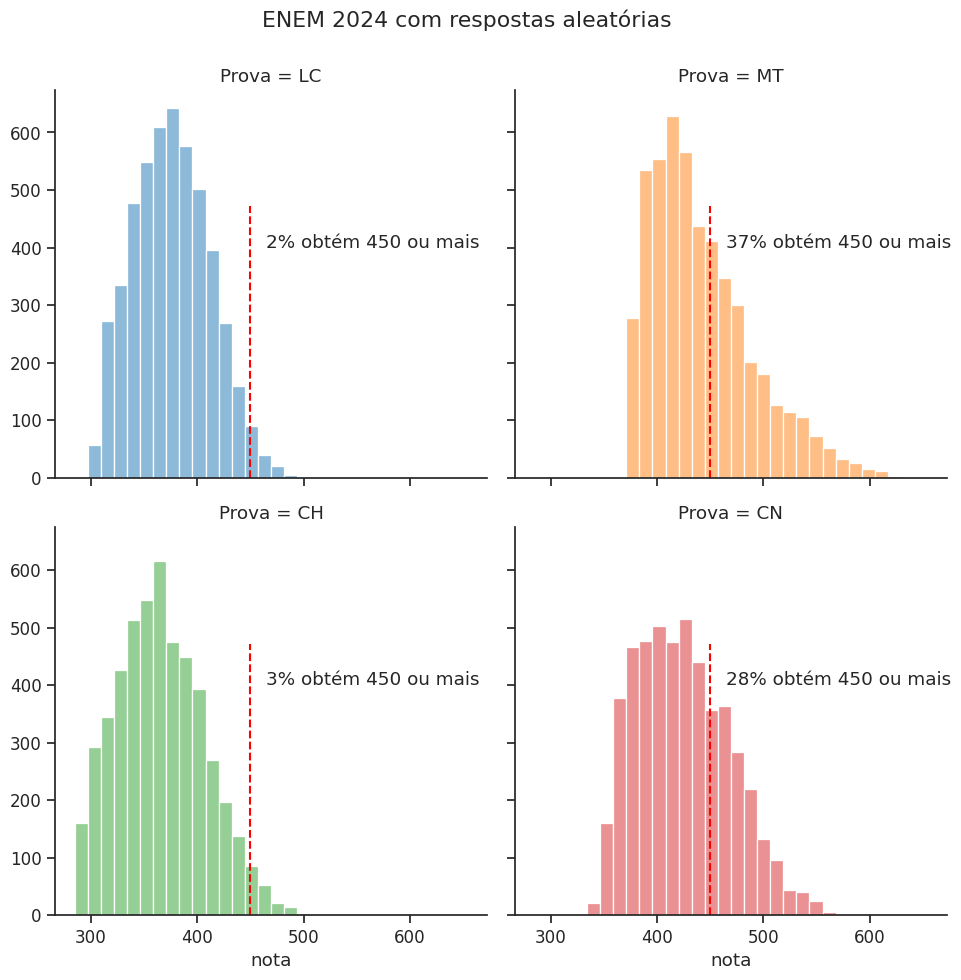

In [186]:
sns.set_style('ticks')
sns.set_context('notebook',font_scale=1.1)
g = sns.displot(data=data,x='nota',col='area', hue='area',col_wrap=2,legend=False,bins=30)
g.set_titles(col_template="Prova = {col_name}")
g.set_ylabels("")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("ENEM 2024 com respostas aleatórias")
l450 = data.groupby('area')['nota'].agg(larger)
for ax,area in zip(g.axes,g.col_names):
    ax.text(465,400,f"{100*l450[area]:.0f}% obtém 450 ou mais")
    ax.axvline(x=450,ymax=0.7,ls='--',color='red')